In [5]:
"""how long to load as list"""

# open /root/Moonshot/SMART-Moonshot/dataset/my_molecules_gen.smi and load as list
f = open('/root/Moonshot/SMART-Moonshot/dataset/fake_smiles_50M.smi', 'r')
lines = f.readlines()

(array([1.4210e+03, 1.3531e+04, 3.6633e+04, 5.4736e+04, 4.6400e+04,
        3.7268e+04, 2.6865e+04, 2.2268e+04, 1.5443e+04, 1.1542e+04,
        6.3800e+03, 4.2860e+03, 2.9760e+03, 2.0150e+03, 1.2340e+03,
        8.9000e+02, 5.7100e+02, 5.8300e+02, 4.0800e+02, 2.7700e+02,
        4.0600e+02, 2.8700e+02, 2.0000e+02, 2.1000e+02, 1.3000e+02,
        1.1500e+02, 1.0500e+02, 5.1000e+01, 5.5000e+01, 2.3000e+01,
        3.8000e+01, 1.8000e+01, 1.3000e+01, 1.1000e+01, 7.0000e+00,
        6.0000e+00, 6.0000e+00, 1.4000e+01, 5.0000e+00, 0.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  1.  ,  13.52,  26.04,  38.56,  51.08,  63.6 ,  76.12,  88.64,
        101.16, 113.68, 126.2 , 138.72, 151.24, 163.76, 176.28, 188.8 ,
        201.32, 213.84, 226.36, 238.88, 251.4 , 263.92, 276.44, 288.96,
        301.48, 314.  , 326.52, 339.04, 351.56, 364.08, 376.6 , 389.12,
        401.64, 414.16, 426.68

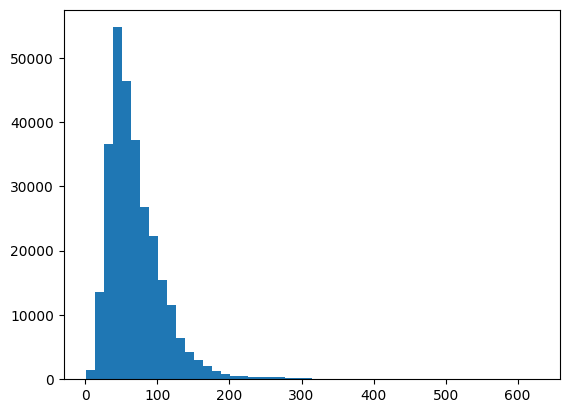

In [3]:
import pickle
smiles_2d_dataset = list(pickle.load(open('/workspace/SMILES_dataset/train/SMILES/index.pkl', 'rb')).values())
smiles_1d_dataset = list(pickle.load(open('/workspace/OneD_Only_Dataset/train/SMILES/index.pkl', 'rb')).values())
all_len=[len(x) for x in smiles_2d_dataset+smiles_1d_dataset]
import matplotlib.pyplot as plt
plt.hist(all_len, bins=50)

In [4]:
print("max length: ", max(all_len))

max length:  627


In [2]:
smile_and_name_pairs = [line.strip().split("\t") for line in lines]
all_smiles = [  smile for smile, name in smile_and_name_pairs]

In [3]:
lines[45].strip()

'C(\\C(=O)O)(C)=C\\CCCCCCC\tgenmol_46'

In [4]:
unique_smiles = set(all_smiles)
len(unique_smiles)

16319870

In [5]:
unique_smiles = list(unique_smiles)
len_unique_smiles = len(unique_smiles)

In [7]:
len_each_smile = [len(smile) for smile in unique_smiles]

In [9]:
import numpy as np
len_each_smile = np.array(len_each_smile)
len_each_smile.mean(), len_each_smile.std(), len_each_smile.min(), len_each_smile.max()

(100.14399195581828, 61.08946937438672, 1, 1175)

In [14]:
# count how many smiles are longer than 300 characters
len_long_smiles = len_each_smile[len_each_smile > 500]
len(len_long_smiles)

9177

(array([3.704520e+05, 2.328718e+06, 3.396245e+06, 3.015946e+06,
        2.449677e+06, 1.653572e+06, 1.116397e+06, 6.799430e+05,
        4.486210e+05, 2.738130e+05, 1.896670e+05, 1.239730e+05,
        8.788200e+04, 5.913700e+04, 4.175500e+04, 2.652000e+04,
        1.840400e+04, 1.167500e+04, 8.182000e+03, 5.359000e+03,
        3.990000e+03, 2.704000e+03, 1.967000e+03, 1.365000e+03,
        1.059000e+03, 7.680000e+02, 5.770000e+02, 4.310000e+02,
        3.020000e+02, 2.420000e+02, 1.410000e+02, 1.050000e+02,
        7.800000e+01, 7.100000e+01, 3.200000e+01, 3.900000e+01,
        1.500000e+01, 1.300000e+01, 1.000000e+01, 1.000000e+01,
        3.000000e+00, 5.000000e+00, 0.000000e+00, 2.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.00000e+00, 2.44800e+01, 4.79600e+01, 7.14400e+01, 9.49200e+01,
        1.18400e+02, 1.41880e+02, 1.65360e+02, 1.88840e+02, 2.12320e+02,
        2.35800e+02, 2.59280e+02, 2.82760e+02, 3

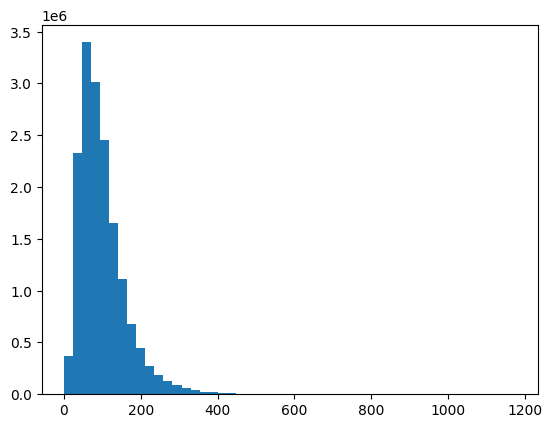

In [13]:
import matplotlib.pyplot as plt
plt.hist(len_each_smile, bins=50)

In [12]:
import pickle
for split in ['train',"val", 'test']:
    if split=='train':
        ind_start = 0
        ind_end = int(len_unique_smiles*0.8)
    
    if split=='val':
        ind_start = int(len_unique_smiles*0.8)
        ind_end = int(len_unique_smiles*0.9)
    if split=='test':
        ind_start = int(len_unique_smiles*0.9)
        ind_end = len(unique_smiles)  
        
    current_smiles = unique_smiles[ind_start:ind_end]  
    with open(f'/root/Moonshot/SMART-Moonshot/dataset/{split}_smiles.pkl', 'wb') as f:
        pickle.dump(current_smiles, f)
    

In [15]:
# filter out smiles that are longer than 300 characters

unique_smiles = list(filter(lambda x: len(x) <= 300, unique_smiles))
len_unique_smiles = len(unique_smiles)


for split in ['train',"val", 'test']:
    if split=='train':
        ind_start = 0
        ind_end = int(len_unique_smiles*0.8)
    
    if split=='val':
        ind_start = int(len_unique_smiles*0.8)
        ind_end = int(len_unique_smiles*0.9)
    if split=='test':
        ind_start = int(len_unique_smiles*0.9)
        ind_end = len_unique_smiles
        
    current_smiles = unique_smiles[ind_start:ind_end]  
    with open(f'/root/Moonshot/SMART-Moonshot/dataset/{split}_smiles_shorter_than_300.pkl', 'wb') as f:
        pickle.dump(current_smiles, f)